<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_04_ProjFour_Supervised_Clf_and_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from scipy import stats
from sklearn import svm

import os

import sys
import sklearn
print(sys.version)
!python --version
print("numpy: ", np.__version__)
print("sklearn: ", sklearn.__version__)

3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
Python 3.11.4
numpy:  1.23.5
sklearn:  1.2.2


In [ ]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

In [ ]:
path = './forest_fires/'

In [ ]:
dfmain = pd.read_csv(path + 'forestfires.csv', header=0)
print(dfmain.shape)
dfmain.head(2)

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


In [ ]:
dfmain['fire_scale'] = dfmain['area'].apply(lambda x: 'no_fire' if (x==0) else
                                                      'small_fire' if ((x>0)&(x<2))else
                                                      'large_fire'
                                           )
print(dfmain.shape)
dfmain.head(2)

(517, 14)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire_scale
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,no_fire
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,no_fire


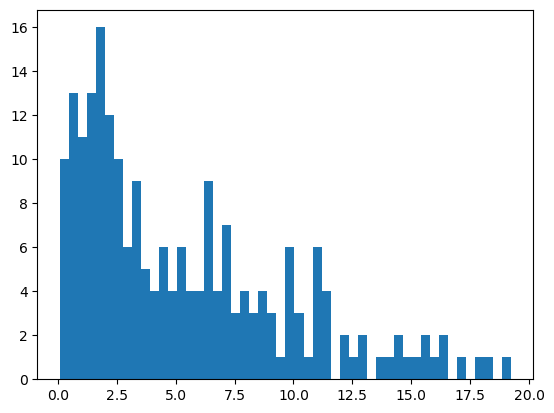

In [ ]:
plt.hist(dfmain[(dfmain['area']>0)&(dfmain['area']<20)].area, bins=50)

plt.show()

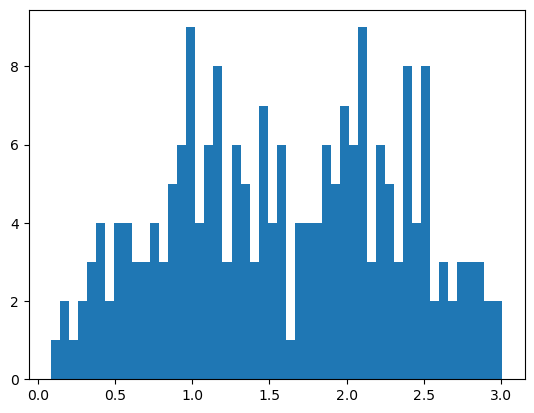

In [ ]:
plt.hist(np.log(dfmain[(dfmain['area']>0)&(dfmain['area']<20)].area + 1), bins=50)

plt.show()

<BarContainer object of 12 artists>

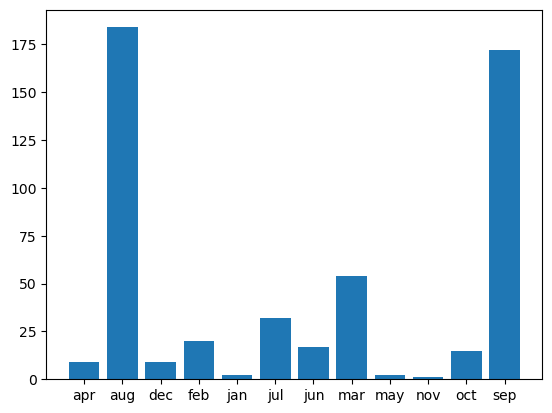

In [ ]:
t = dfmain.groupby(['month'])['month'].count()
plt.bar(t.index, t)

In [ ]:
dfmain.groupby(['month', 'fire_scale'])['fire_scale'].count()

month  fire_scale
apr    large_fire     4
       no_fire        5
aug    large_fire    71
       no_fire       85
       small_fire    28
dec    large_fire     9
feb    large_fire     9
       no_fire       10
       small_fire     1
jan    no_fire        2
jul    large_fire    12
       no_fire       14
       small_fire     6
jun    large_fire     5
       no_fire        9
       small_fire     3
mar    large_fire    16
       no_fire       35
       small_fire     3
may    large_fire     1
       no_fire        1
nov    no_fire        1
oct    large_fire     5
       no_fire       10
sep    large_fire    76
       no_fire       75
       small_fire    21
Name: fire_scale, dtype: int64

<BarContainer object of 7 artists>

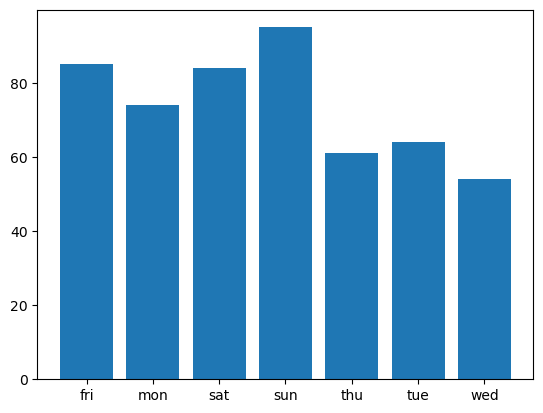

In [ ]:
t = dfmain.groupby(['day'])['day'].count()
plt.bar(t.index, t)

In [ ]:
d = dfmain[dfmain['area']>0].copy()
print(d.shape)
for m in d['month'].unique():
    if((m!='aug')&(m!='sep')):
        temp = d[d['month']==m].sample(300, replace=True)
        d = pd.concat([d, temp], axis=0)

print(d.shape)

(270, 14)
(2670, 14)


<BarContainer object of 10 artists>

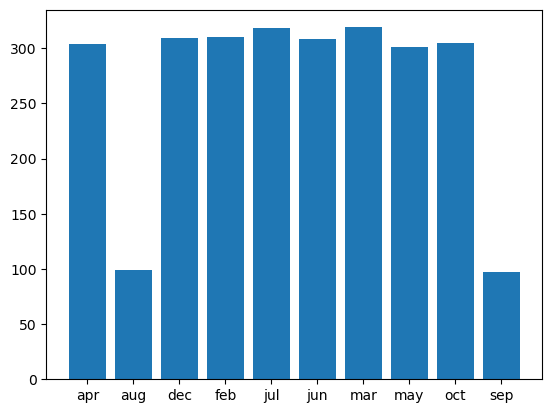

In [ ]:
t = d.groupby(['month'])['month'].count()
plt.bar(t.index, t)

In [ ]:
X = d.drop(['area', 'fire_scale'], axis=1)
y = d['area']

In [ ]:
X = pd.get_dummies(X, ['month', 'day'])
X.head(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,month_dec,month_feb,month_jul,month_jun,month_mar,month_may,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
138,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
139,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y+1), shuffle=True)
print(x_train.shape, x_test.shape)

(2002, 27) (668, 27)


In [ ]:
x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

In [ ]:
scl=preprocessing.StandardScaler()
scl.fit(x_train_orig)

x_train_orig = scl.transform(x_train_orig)
x_test_orig = scl.transform(x_test_orig)

# Combine
x_train = np.concatenate([x_train_orig, np.array(x_train_cat)], axis=1)
x_test = np.concatenate([x_test_orig, np.array(x_test_cat)], axis=1)

print(x_train.shape, x_test.shape)

(2002, 27) (668, 27)


mse:  0.6204
mae:  0.545
r2:  0.4441


Text(0, 0.5, 'y_pred')

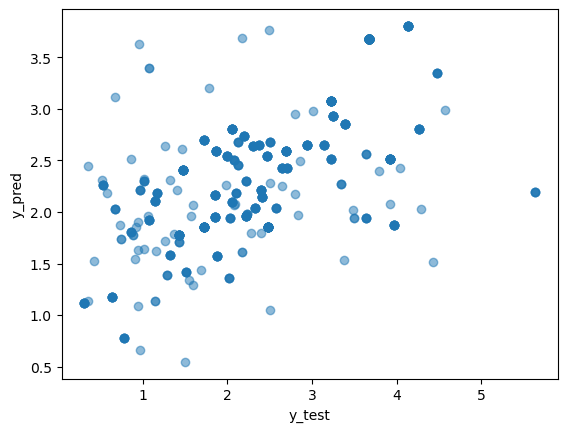

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

# Predict
y_pred = reg.predict(x_test)

# Score
mse = metrics.mean_squared_error(y_test, y_pred)
print('mse: ', np.round(mse, 4))

mae = metrics.mean_absolute_error(y_test, y_pred)
print('mae: ', np.round(mae, 4))

r2 = metrics.r2_score(y_test, y_pred)
print('r2: ', np.round(r2, 4))


# Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

mse:  0.3422
mae:  0.3178
r2:  0.6934


Text(0, 0.5, 'y_pred')

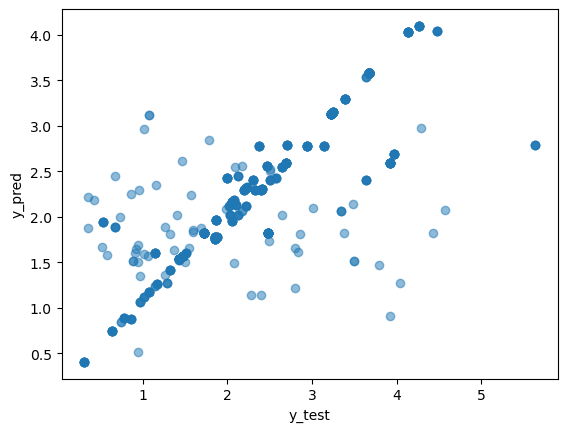

In [ ]:
reg = svm.SVR(C=1, kernel='rbf', gamma='auto', max_iter=int(5e4), cache_size=1000)
reg.fit(x_train, y_train)

# Predict
y_pred = reg.predict(x_test)

# Score
mse = metrics.mean_squared_error(y_test, y_pred)
print('mse: ', np.round(mse, 4))

mae = metrics.mean_absolute_error(y_test, y_pred)
print('mae: ', np.round(mae, 4))

r2 = metrics.r2_score(y_test, y_pred)
print('r2: ', np.round(r2, 4))


# Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
dfc = dfmain.copy()

In [ ]:
dfc.fire_scale.value_counts()

no_fire       247
large_fire    208
small_fire     62
Name: fire_scale, dtype: int64

In [ ]:
print(dfc.shape)
for m in dfc['month'].unique():
    if((m!='aug')&(m!='sep')):
        temp = dfc[dfc['month']==m].sample(300, replace=True)
        dfc = pd.concat([dfc, temp], axis=0)

print(dfc.shape)

(517, 14)
(3517, 14)


In [ ]:
Xc = dfc.drop(['area', 'fire_scale'], axis=1)
yc = dfc['fire_scale']

In [ ]:
Xc = pd.get_dummies(Xc, ['month', 'day'])
Xc.head(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
print(Xc.shape)
Xc = Xc[Xc.columns[(Xc.var(axis=0)>0).values]]
print(Xc.shape)

(3517, 29)
(3517, 29)


In [ ]:
print(Xc.shape)
x_corr = Xc.corr()**2

x_upper = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))

# r2>0.7
drop_col = [col for col in x_upper.columns if any(x_upper[col] > 0.70)]

Xc = Xc.drop(drop_col, axis=1)
print(Xc.shape)

(3517, 29)
(3517, 29)


/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_81126/853203239.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_upper = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xc, yc,
                                                    shuffle=True, stratify=yc)
print(x_train.shape, x_test.shape)

(2637, 29) (880, 29)


In [ ]:
x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

In [ ]:
scl=preprocessing.StandardScaler()
scl.fit(x_train_orig)

x_train_orig = scl.transform(x_train_orig)
x_test_orig = scl.transform(x_test_orig)

x_train = np.concatenate([x_train_orig, np.array(x_train_cat)], axis=1)
x_test = np.concatenate([x_test_orig, np.array(x_test_cat)], axis=1)

print(x_train.shape, x_test.shape)

(2637, 29) (880, 29)


In [ ]:
clf = linear_model.LogisticRegression(max_iter=int(1e7), penalty='elasticnet', solver='saga', l1_ratio=0.75)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acu = metrics.accuracy_score(y_test, y_pred)
print("acu: ", np.round(acu, 4))

cm = metrics.confusion_matrix(y_test, y_pred)
cm

acu:  0.7614


array([[235,  99,   2],
       [ 55, 430,   8],
       [ 14,  32,   5]])

In [ ]:
clf = svm.SVC(C=1, kernel='rbf', gamma='auto', max_iter=int(5e4), cache_size=1000)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acu = metrics.accuracy_score(y_test, y_pred)
print("acu: ", np.round(acu, 4))

cm = metrics.confusion_matrix(y_test, y_pred)
cm

acu:  0.8409


array([[270,  66,   0],
       [ 30, 463,   0],
       [ 17,  27,   7]])